# Crop price recommender system

In [1]:
# IMPORTING FILES
import pandas as pd
import numpy as np
from pathlib import PurePosixPath, PureWindowsPath
from matplotlib import pyplot as plt

In [2]:
# IN-HOUSE FUNCTION: RETURN DIRECTORY SPECIFIC TO RUNNING OS
def get_directory(path):
    if os.name == 'posix':
        return str(PurePosixPath(path))
    else:
        return str(PureWindowsPath(path))

In [3]:
# VARIABLES
HARGAPANGAN_LOCATION = get_directory('./dataset/time-series')
TRAIN_SPLIT = 0.8
WINDOW_SIZE = 180
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

# TEST
print(HARGAPANGAN_LOCATION)

dataset\time-series


For the following code block, we are getting all the data from four excel files (trust me, the data is spread horizontally and I don't wanna mess too much)

In [52]:
_APPLE = pd.read_excel(get_directory(HARGAPANGAN_LOCATION + '/Harga Pangan - Compiled.xlsx'), skiprows=1, sheet_name='apel').set_index('Tanggal')
_ORANGE = pd.read_excel(get_directory(HARGAPANGAN_LOCATION + '/Harga Pangan - Compiled.xlsx'), skiprows=1, sheet_name='jeruk').set_index('Tanggal')

In [53]:
# Clean data from strips
_APPLE.loc[:, 'Harga Lokal'] = _APPLE['Harga Lokal'].replace('-', np.NaN)
_APPLE.loc[:, 'Harga Impor'] = _APPLE['Harga Lokal'].replace('-', np.NaN)
_ORANGE.loc[:, 'Harga Lokal'] = _ORANGE['Harga Lokal'].replace('-', np.NaN)
_ORANGE.loc[:, 'Harga Impor'] = _ORANGE['Harga Lokal'].replace('-', np.NaN)

In [49]:
_APPLE

,Harga Impor,Harga Lokal
Tanggal,,
15/12/2017,25000.0,0.714286
18/12/2017,23350.0,0.667143
19/12/2017,24150.0,0.690000
20/12/2017,23850.0,0.681429
21/12/2017,22750.0,0.650000
...,...,...
24/05/2021,28150.0,0.804286
25/05/2021,28150.0,0.804286
26/05/2021,30000.0,0.857143


In [62]:
for i in _ORANGE['Harga Lokal'].index:
    if _ORANGE.loc[i, 'Harga Lokal'] != _ORANGE.loc[i, 'Harga Lokal']:   # check for NaN
        _temp = np.array([])
        for j in range(-2, 3):
            if _ORANGE.loc[i+j, 'Harga Lokal'] == _ORANGE.loc[i+j, 'Harga Lokal']:
                _temp = np.append(_temp, _ORANGE.loc[j, 'Harga Lokal'])
        _ORANGE.loc[i, 'Harga Lokal'] = _ORANGE.loc[i-2:i+3, 'Harga Lokal'] / 5

TypeError: can only concatenate str (not "int") to str

In [58]:
_APPLE.loc['28/05/2021', 'Harga Lokal']

27500.0

In [43]:
len(np.shape(np.array(_APPLE['Harga Lokal'])))

1

In [6]:
_APPLE

,Harga Impor,Harga Lokal
Tanggal,,
15/12/2017,25000.0,25000.0
18/12/2017,23350.0,23350.0
19/12/2017,24150.0,24150.0
20/12/2017,23850.0,23850.0
21/12/2017,22750.0,22750.0
...,...,...
24/05/2021,28150.0,28150.0
25/05/2021,28150.0,28150.0
26/05/2021,30000.0,30000.0


In [7]:
_ORANGE

,Harga Impor,Harga Lokal
Tanggal,,
15/12/2017,10000.0,10000.0
18/12/2017,15000.0,15000.0
19/12/2017,17500.0,17500.0
20/12/2017,20500.0,20500.0
21/12/2017,22250.0,22250.0
...,...,...
24/05/2021,17200.0,17200.0
25/05/2021,16600.0,16600.0
26/05/2021,14500.0,14500.0


In [8]:
_APPLE.index

Index(['15/12/2017', '18/12/2017', '19/12/2017', '20/12/2017', '21/12/2017',
       '22/12/2017', '27/12/2017', '28/12/2017', '29/12/2017', '02/01/2018',
       ...
       '17/05/2021', '18/05/2021', '19/05/2021', '20/05/2021', '21/05/2021',
       '24/05/2021', '25/05/2021', '26/05/2021', '27/05/2021', '28/05/2021'],
      dtype='object', name='Tanggal', length=886)

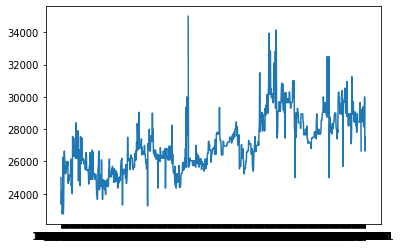

<Figure size 1152x648 with 0 Axes>

In [9]:
# Here is the time series for the average apple price in Indonesia

plt.plot(_APPLE.index, _APPLE['Harga Lokal'])
plt.figure(figsize=(16,9))
plt.show()

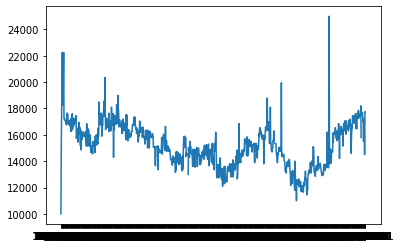

<Figure size 1152x648 with 0 Axes>

In [10]:
# Here is the time series for the average orange price in Indonesia

plt.plot(_ORANGE.index, _ORANGE['Harga Lokal'])
plt.figure(figsize=(16,9))
plt.show()

In [11]:
_APPLE.describe()

,Harga Impor,Harga Lokal
count,880.000000,880.000000
mean,27091.079545,27091.079545
std,1746.941900,1746.941900
min,22750.000000,22750.000000
25%,25850.000000,25850.000000
50%,26800.000000,26800.000000
75%,28200.000000,28200.000000
max,35000.000000,35000.000000


In [12]:
_ORANGE.describe()

,Harga Impor,Harga Lokal
count,880.000000,880.000000
mean,15209.545455,15209.545455
std,1615.887355,1615.887355
min,10000.000000,10000.000000
25%,14000.000000,14000.000000
50%,15150.000000,15150.000000
75%,16362.500000,16362.500000
max,25000.000000,25000.000000


## Data preparation - for machine learning model

In [13]:
# Data normalisation
_APPLE.loc[:, 'Harga Lokal'] = _APPLE['Harga Lokal'] / int(_APPLE['Harga Lokal'].max())
_ORANGE.loc[:, 'Harga Lokal'] = _ORANGE['Harga Lokal'] / int(_ORANGE['Harga Lokal'].max())

In [14]:
# Sanity check
_APPLE

,Harga Impor,Harga Lokal
Tanggal,,
15/12/2017,25000.0,0.714286
18/12/2017,23350.0,0.667143
19/12/2017,24150.0,0.690000
20/12/2017,23850.0,0.681429
21/12/2017,22750.0,0.650000
...,...,...
24/05/2021,28150.0,0.804286
25/05/2021,28150.0,0.804286
26/05/2021,30000.0,0.857143


In [27]:
# Train-test split
_count = len(_APPLE)
_APPLE_LOCAL = _APPLE['Harga Lokal']
_APPLE_TRAIN = np.array(_APPLE_LOCAL[:int(_count*TRAIN_SPLIT)])
_APPLE_TEST = np.array(_APPLE_LOCAL[int(_count*TRAIN_SPLIT):])

In [59]:
_APPLE_TRAIN

array([0.71428571, 0.66714286, 0.69      , 0.68142857, 0.65      ,
       0.67142857, 0.75      , 0.65      , 0.67142857, 0.74285714,
       0.76142857, 0.74285714, 0.74285714, 0.72142857, 0.72142857,
       0.72571429, 0.73428571, 0.73      , 0.74285714, 0.73428571,
       0.74285714, 0.70428571, 0.71285714, 0.71857143, 0.70857143,
       0.71857143, 0.71857143, 0.71857143, 0.71857143, 0.74714286,
       0.7       , 0.70571429, 0.71857143, 0.68571429, 0.78714286,
       0.77428571, 0.75285714, 0.78428571, 0.77      , 0.75142857,
       0.75142857, 0.77      , 0.77      , 0.74857143, 0.81142857,
       0.76571429, 0.76428571, 0.74857143, 0.75714286, 0.79714286,
       0.78142857, 0.70857143, 0.76285714, 0.74714286, 0.76285714,
       0.74285714, 0.7       , 0.78714286, 0.73857143, 0.76571429,
       0.74857143, 0.78428571, 0.75285714, 0.74428571, 0.74714286,
       0.74428571, 0.74714286, 0.73857143, 0.74285714, 0.74      ,
       0.74      , 0.72857143, 0.74571429, 0.75857143, 0.75571

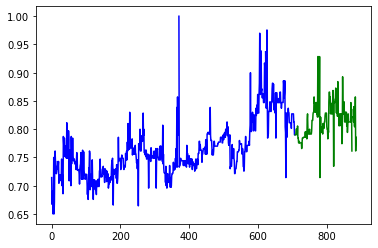

In [30]:
# Visualize the difference between train and test
plt.plot(
    range(int(_count * TRAIN_SPLIT)), _APPLE_TRAIN, 'b',
    range(int(_count * TRAIN_SPLIT), _count), _APPLE_TEST, 'g'
)
plt.show()

In [31]:
# Nyomot dari Mr. Moroney ya yang ini :)
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [34]:
import tensorflow as tf

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

tf.keras.backend.clear_session()
_input = windowed_dataset(_APPLE_TRAIN, WINDOW_SIZE, BATCH_SIZE, SHUFFLE_BUFFER_SIZE)

time_series_pred = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = False)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
])

learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-5 * 10**(epoch / 20)
)

optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-5, momentum = 0.9)
time_series_pred.compile(
    loss = tf.keras.losses.Huber(),
    optimizer = optimizer,
    metrics = ['mae', 'acc']
)

history_opt = time_series_pred.fit(
    _input,
    epochs = 250,
    callbacks = [learning_rate_scheduler]
)

Epoch 1/250
17/17 [==============================] - 8s 59ms/step - loss: nan - mae: nan - acc: 0.0000e+00
Epoch 2/250
17/17 [==============================] - 1s 54ms/step - loss: nan - mae: nan - acc: 0.0000e+00
Epoch 3/250
17/17 [==============================] - 1s 57ms/step - loss: nan - mae: nan - acc: 0.0000e+00
Epoch 4/250
17/17 [==============================] - 1s 55ms/step - loss: nan - mae: nan - acc: 0.0000e+00
Epoch 5/250
17/17 [==============================] - 1s 57ms/step - loss: nan - mae: nan - acc: 0.0000e+00
Epoch 6/250
17/17 [==============================] - 1s 57ms/step - loss: nan - mae: nan - acc: 0.0000e+00
Epoch 7/250
 5/17 [=======>......................] - ETA: 0s - loss: nan - mae: nan - acc: 0.0000e+00

KeyboardInterrupt: 

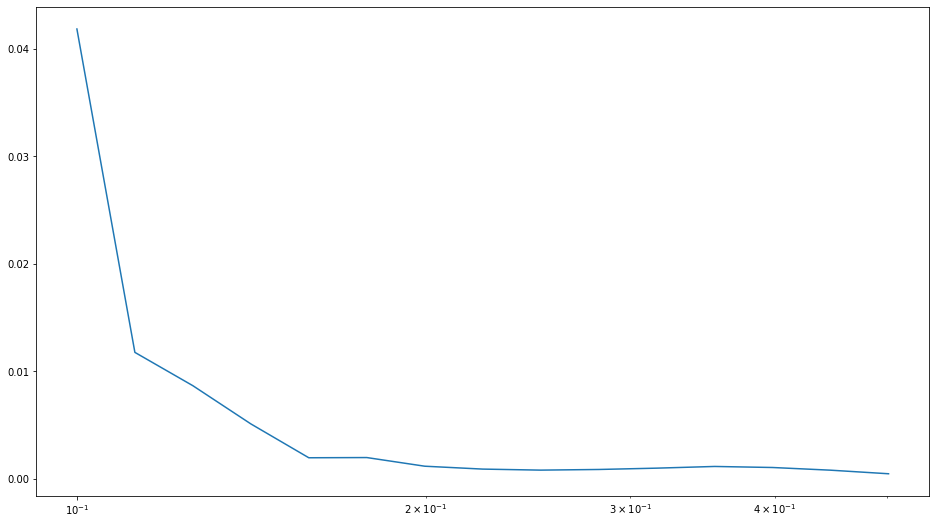

In [19]:
plt.figure(figsize=(16,9))
plt.semilogx(history_opt.history['lr'], history_opt.history['loss'])
plt.show()

Verdict: we get 1e-1 as our learning rate.

In [20]:
tf.keras.backend.clear_session()

bawang_merah_pred = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = False)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-1, momentum = 0.9)
bawang_merah_pred.compile(
    loss = tf.keras.losses.Huber(),
    optimizer = optimizer,
    metrics = ['acc']
)

history = bawang_merah_pred.fit(
    _input,
    epochs = 500,
)

1s 62ms/step - loss: 7.9297e-05 - acc: 0.0000e+00
Epoch 311/500
18/18 [==============================] - 1s 61ms/step - loss: 1.1196e-04 - acc: 0.0000e+00
Epoch 312/500
18/18 [==============================] - 1s 64ms/step - loss: 7.7026e-05 - acc: 0.0000e+00
Epoch 313/500
18/18 [==============================] - 1s 65ms/step - loss: 8.1682e-05 - acc: 0.0000e+00
Epoch 314/500
18/18 [==============================] - 1s 65ms/step - loss: 7.9658e-05 - acc: 0.0000e+00
Epoch 315/500
18/18 [==============================] - 1s 64ms/step - loss: 8.4533e-05 - acc: 0.0000e+00
Epoch 316/500
18/18 [==============================] - 1s 62ms/step - loss: 9.2762e-05 - acc: 0.0000e+00
Epoch 317/500
18/18 [==============================] - 1s 66ms/step - loss: 7.7912e-05 - acc: 0.0000e+00
Epoch 318/500
18/18 [==============================] - 1s 63ms/step - loss: 8.5492e-05 - acc: 0.0000e+00
Epoch 319/500
18/18 [==============================] - 1s 66ms/step - loss: 1.1117e-04 - acc: 0.0000e+00
Epoch

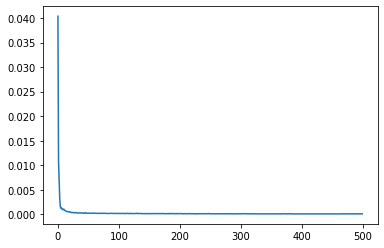

In [21]:
plt.plot(range(len(history.history['loss'])), history.history['loss'])
plt.show()

747

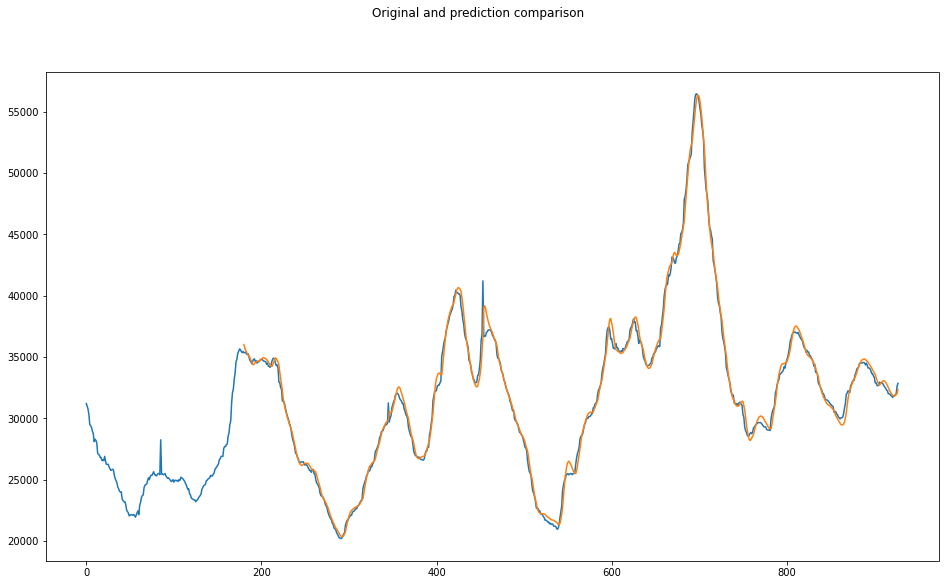

In [22]:
forecast = []
results = []
for i in range(len(BAWANG_MERAH) - WINDOW_SIZE):
    print('\r'+str(i), end='')
    forecast.append(bawang_merah_pred.predict(BAWANG_MERAH[i:i + WINDOW_SIZE][np.newaxis]))

results = np.array(forecast)[:, 0, 0]

fig = plt.figure(figsize=(16,9))
plt.suptitle('Original and prediction comparison')
plt.plot(range(len(BAWANG_MERAH)), BAWANG_MERAH * 50000)
plt.plot(range(WINDOW_SIZE, len(results) + WINDOW_SIZE), results * 50000)
plt.show()

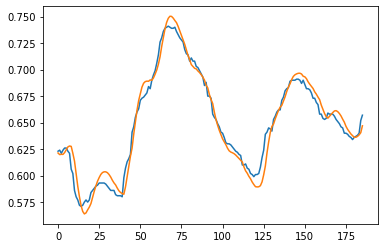

In [23]:
# FOCUS ON TEST
plt.plot(range(len(BAWANG_MERAH_TEST)), BAWANG_MERAH_TEST)
plt.plot(range(len(BAWANG_MERAH_TEST)), results[int(TRAIN_SPLIT * _count) - WINDOW_SIZE:_count - WINDOW_SIZE])

364

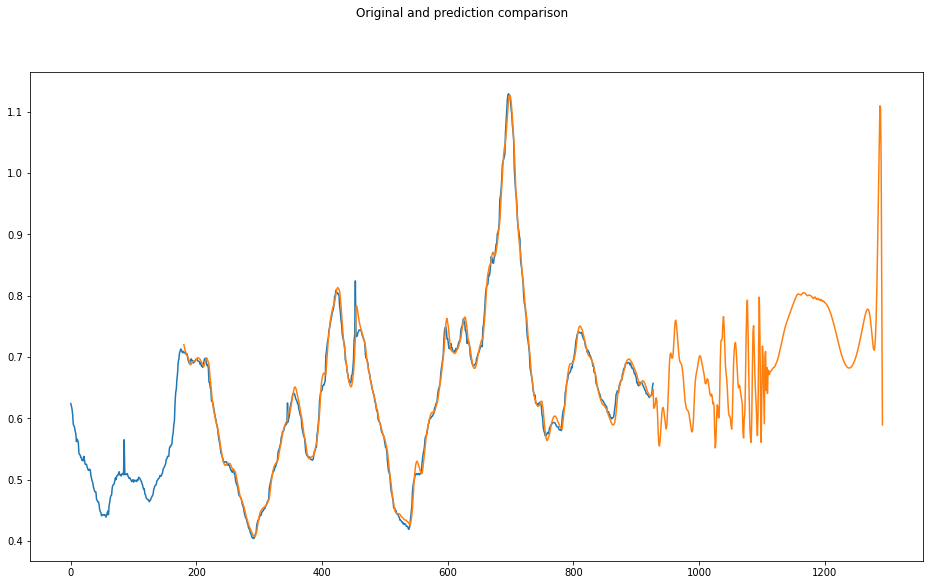

In [24]:
# Can it recommend prices for one more year? (SPOILER: DOWNSIDE KEKW)
forecast_1y = []
results_1y = results
for i in range(365):
    print('\r'+str(i), end='')
    _temp = bawang_merah_pred.predict(results_1y[
        len(results_1y) - 365 + i: len(results_1y) - 365 + i + WINDOW_SIZE
        ][np.newaxis])
    results_1y = np.append(results_1y, _temp[0, 0])

results = np.array(forecast)

fig = plt.figure(figsize=(16,9))
plt.suptitle('Original and prediction comparison')
plt.plot(range(len(BAWANG_MERAH)), BAWANG_MERAH)
plt.plot(range(WINDOW_SIZE, len(results) + 365 + WINDOW_SIZE), results_1y)
plt.show()

In [25]:
results_1y[
        len(results_1y) - 365 + i: len(results_1y) - 365 + i + WINDOW_SIZE
        ]

array([0.58926666], dtype=float32)

In [26]:
BAWANG_MERAH[1:6, np.newaxis]

array([[0.62 ],
       [0.615],
       [0.606],
       [0.59 ],
       [0.588]])

NameError: name 'forecast' is not defined